In [41]:
import pysd
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import collections as cl
import math

In [42]:
vensimDirectory='./Simulation Files/Prosumers & defectors'
vensimFile ='net metering-no fixed tariff.mdl'
filepath = Path(vensimDirectory,vensimFile)
model = pysd.read_vensim(str(filepath))

In [43]:
period_range=[1,3]+list(range(6,36,6))
print(period_range)

[1, 3, 6, 12, 18, 24, 30]


In [44]:
important_vars=['Electricity Tariff','Budget Deficit', 'Utility Energy Sale','NPV PV','Total Consumers','Regular Consumers','Prosumers','Defectors','Regular Consumer Average Demand', 'Prosumer Average Demand']

In [49]:
doc = model.doc()
doc.loc[doc['Real Name'].str.contains('rate'),'Real Name']

47     Normal Battery Cost Reduction rate
48          Normal PV Cost Reduction rate
106                population growth rate
Name: Real Name, dtype: object

In [53]:
result=cl.defaultdict(pd.DataFrame)
for p in period_range:
    temp_result = model.run(params={'Tariff Correction Period':p, 'population growth rate':0.001})
    for v in important_vars:
        result[v][p]=temp_result[v]

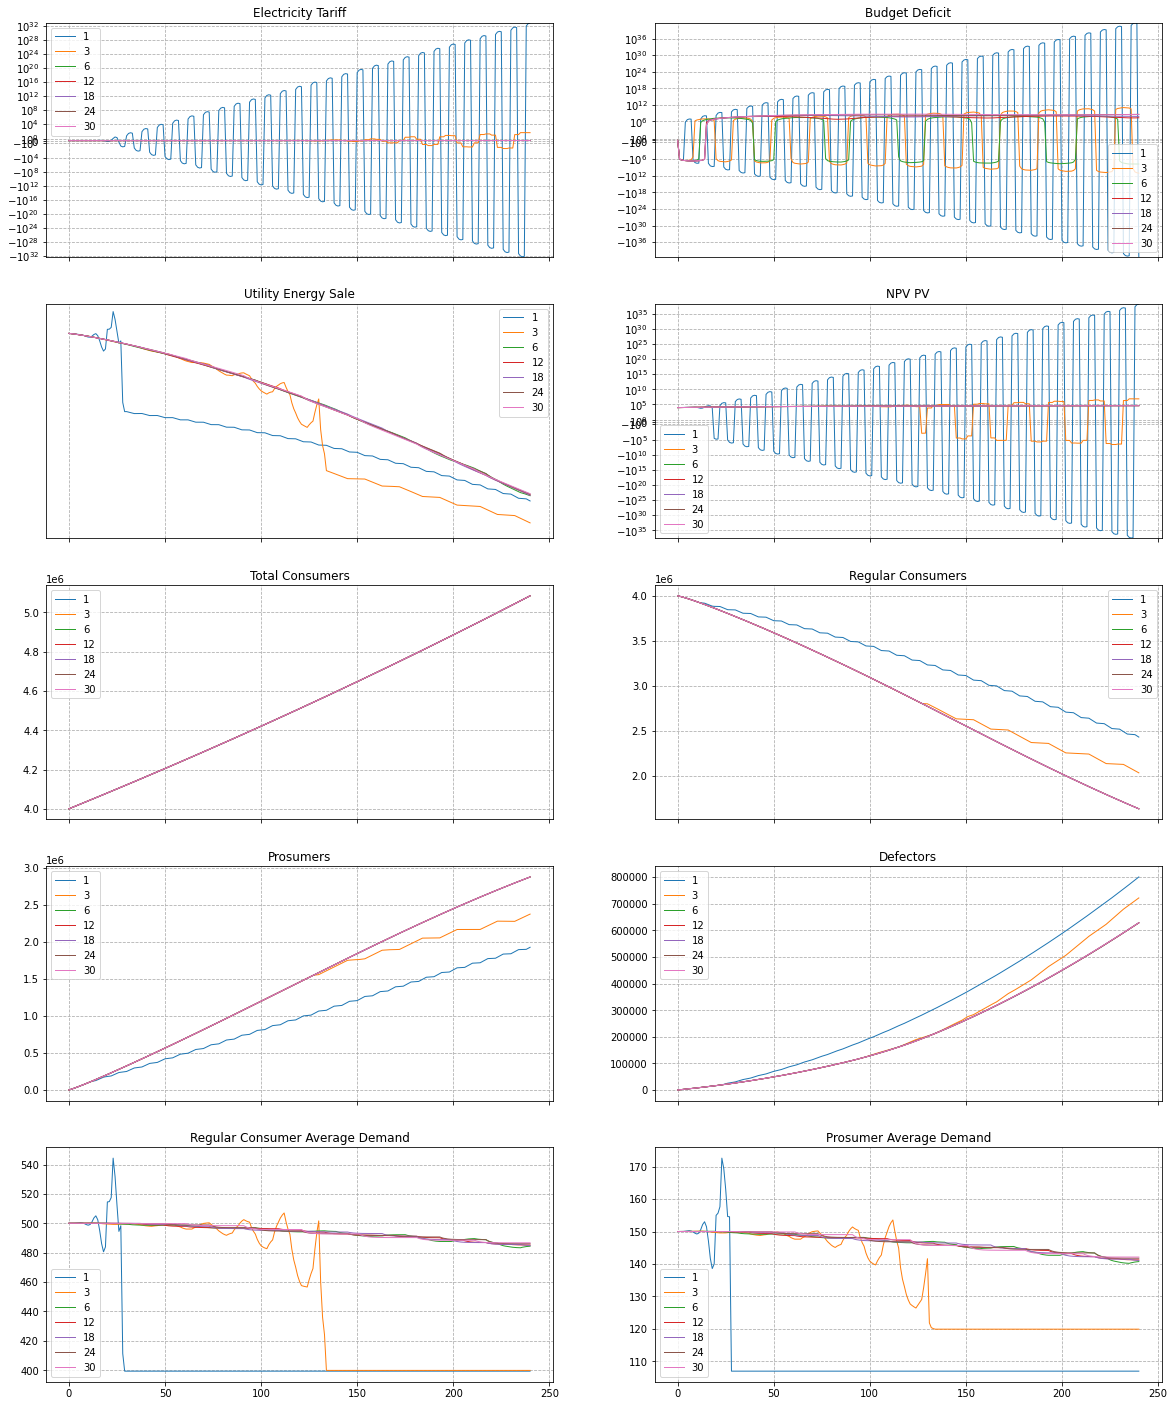

In [57]:
mpl.rc('lines',linewidth=1)  
n_rows= math.ceil(len(important_vars)/2)
fig,ax =plt.subplots(n_rows,2,sharex=True)
fig.set_size_inches(20,n_rows*5)
for i,v in enumerate(important_vars):
    cur_ax=ax[i//2,i%2]
    result[v].plot(ax=cur_ax)
    cur_ax.grid(True,linestyle='--')
    cur_ax.title.set_text(v)
    b,t=cur_ax.get_ylim()
    if(t-b) > 1e8:
        cur_ax.set_yscale('symlog')
        # fig =ax.figure
        # fig.set_size_inches(7,5)
        # fig.suptitle(v,size=20,)
plt.show()

In [ ]:
ax=tariff.iloc[:,2:].plot(figsize=(16,9))
plt.yscale("symlog")
plt.title("Electricity Tariff", fontdict={'size':20, 'fontfamily':'Arial','color':'black', 'fontweight':'bold'});
plt.xlabel('Time')
plt.ylabel('dollars/kWh')
